In [1]:
# Please run this notebook with python version >= '3.6'
# All imports used in the notebook

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pathlib

%matplotlib inline

In [2]:
# All CONSTANTS used in the notebook

# Download URLs
# Image credits and rights belong to the owner of the Image.
# Images are just used for academic purposes.
# URL: http://sipi.usc.edu/database/database.php?volume=misc&image=13#top

# Set the path to the Test Image
PATH = pathlib.Path('~/Downloads').expanduser() / '4.2.07.tiff'
CHANNELS = 3

In [3]:
# Utility functions

def read_image(path: pathlib.Path):
    """Reads image from the given Path
    
    Returns: `np.ndarray`, matrix of Image
    """
    return mpimg.imread(path)

def plot_image(image: np.ndarray, title: str = '', show: bool = False):
    """Utility function for plotting Images"""
    plt.figure()
    plt.imshow(image)
    plt.title(title)
    if show:
        plt.show()

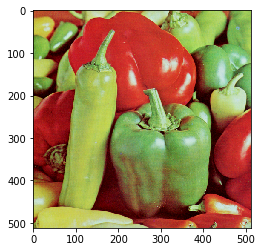

Image Shape: (512, 512, 3)


In [4]:
image = read_image(PATH)
plot_image(image, show=True)

# RGB image
assert CHANNELS == image.shape[-1]
print(f'Image Shape: {image.shape}')

In [5]:
class KMeans:
    def __init__(
        self,
        X: np.ndarray,
        *,
        k: int,
        threshold: float = 0.001,
        epochs: int = 1000):
        """
        Args:
            X: `np.ndarray`, Input Data matrix of size `N * dim`, 
                where `N` is no. of input samples, `dim` is dimension of each input sample.
            k:
            threshold:
            epochs:
        """
        assert X.ndim == 2
        self.X = X.T
        self.N, self.dim = self.X.shape
        self.k = k
        self.threshold = threshold
        self.epochs = epochs
        self._centroids = self._get_init_centroids()

    def _get_init_centroids(self):
        """Select k random points from the input sample X"""
        positions = np.random.permutation(self.N)[:self.k]
        return self.X[positions]

    def _check_convergence(self, new_centroids):
        """Returns the total change in centroids position"""
        change = np.linalg.norm(self._centroids - new_centroids)
        print(f'Total change in centroid locations: {change}')
        return change <= self.threshold

    def _calculate_error(self):
        """Returns the sum of distance of each point from its centroid"""
        cluster = self.clusters
        return sum(np.linalg.norm(self.X[cluster == i] - self.centroids[i]) for i in range(self.k))

    @property
    def clusters(self):
        """Returns `nd.array`, containing cluster number of each point"""
        distances = np.array([np.linalg.norm(self.X - i, axis = 1) for i in self._centroids]).T
        cluster = np.argmin(distances, axis=1)
        return cluster

    def fit(self):
        # Loop till one of the following is achieved:
        # Convergence or Max epochs
        for epoch in range(self.epochs):
            print(f'\nEpoch {epoch}:')
            cluster = self.clusters
            new_centroids = []
            for i in range(self.k):
                cluster_i = self.X[cluster == i]
                centroid_i = np.mean(cluster_i, 0)
                new_centroids.append(centroid_i)

            # Check for convergence and update list of centroids
            is_converged = self._check_convergence(np.array(new_centroids))
            self._centroids = new_centroids
             
            print(f'Sum of distances from respective centroids: {self._calculate_error()}')
            
            if is_converged:
                break

    @property
    def centroids(self):
        """Matrix of all Centroid locations"""
        return self._centroids

# Q1 Implement the K − means algorithm. 
Your program must accept as input an N × d data matrix X, the number of
clusters K, and the stopping threshold e. Your program must output the following:

In [6]:
X = image.reshape(-1, CHANNELS).T
k = 5
threshold = 1e-03,
epochs = 1000

model = KMeans(X, k=k, threshold=threshold, epochs=epochs)

## Q1. A
Output error at the end of each iteration

In [7]:
model.fit()


Epoch 0:
Total change in centroid locations: 253.1356952938971
Sum of distances from respective centroids: 63089.306450453485

Epoch 1:
Total change in centroid locations: 88.24956196276304
Sum of distances from respective centroids: 42843.53220027132

Epoch 2:
Total change in centroid locations: 16.268086783144355
Sum of distances from respective centroids: 41902.87376991203

Epoch 3:
Total change in centroid locations: 9.752039805742559
Sum of distances from respective centroids: 41527.96547543934

Epoch 4:
Total change in centroid locations: 8.256416085429443
Sum of distances from respective centroids: 41116.82737718377

Epoch 5:
Total change in centroid locations: 9.045988708148501
Sum of distances from respective centroids: 40560.43551494783

Epoch 6:
Total change in centroid locations: 9.184496618225761
Sum of distances from respective centroids: 40054.791692917286

Epoch 7:
Total change in centroid locations: 6.769641002424772
Sum of distances from respective centroids: 39771.1

## Q1. B 
The K centroids at convergence

In [8]:
centroids = model.centroids
print("K centroids after convergence are")
print(*centroids, sep='\n')

K centroids after convergence are
[117.50166101 140.68267495  66.99447534]
[164.84018556 190.61626629  91.20222997]
[185.34869537  48.1045184   40.58453833]
[187.8395262  211.98122481 173.31868672]
[78.76752662 14.70088251 12.13841668]


## Q1. C 
The K clusters at convergence.

In [9]:
clusters = model.clusters.reshape(image.shape[0], image.shape[1])
print("cluster assignment for each point after convergence are")
print(clusters)

cluster assignment for each point after convergence are
[[4 2 2 ... 2 2 2]
 [4 2 2 ... 1 1 1]
 [4 2 2 ... 1 1 1]
 ...
 [4 0 0 ... 3 3 1]
 [4 0 0 ... 3 3 1]
 [4 0 0 ... 3 3 3]]


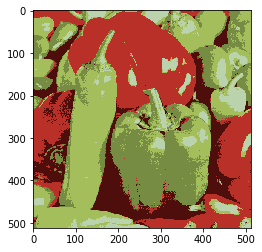

In [10]:
def convert(centroids: np.ndarray, clusters: np.ndarray):
    """Reconstruct image from the clusters and centroids"""
    return np.array([
        [centroids[clusters[i][j]] for j in range(clusters.shape[1])] 
        for i in range(clusters.shape[0])], dtype=int)

plot_image(convert(centroids, clusters), show=True)

# Q.2 PCA

Implement principal component analysis (PCA) to decorrelate data.

In [11]:
def pca(X: np.ndarray):
    """PCA on given 2D matrix shape d X N

    Args:
        X: `np.ndarray`, Input Data matrix of size `dim * N`,
            where `dim` is dimension of each input sample and `N` is no. of input samples.

    Returns P (2D matrix) which can be premultiplied to X
    """

    assert X.ndim == 2
    dim, n = X.shape

    CXX = (X @ X.T) / (n - 1)

    # eigen_values are already sorted in ascending order.
    eign_val, eign_vec = np.linalg.eigh(CXX)

    rec_CXX = eign_vec @ np.diag(eign_val) @ eign_vec.T
    # Recreate CXX and assert the difference is small
    assert np.allclose(CXX, rec_CXX, atol=1e-06)

    return eign_vec.T

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


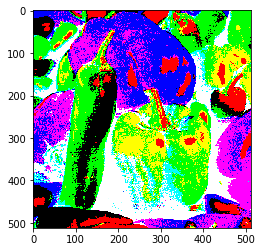

In [12]:
X = image.reshape(-1, CHANNELS).T

# Input should have zero mean
X = X - np.mean(X, axis=1, keepdims=True)
P = pca(X)
Y = P @ X

# Plotting without any modifications. (Y has negative values)
plot_image(Y.T.reshape(512, 512, 3), show=True)

### Q How will you check if your algorithm is working as intended?

Ans: To verify that algorithm is working we assert that reconstructed CXX is almost equal to CXX.  
We also show that the correlation in Y is low, i.e. CYY is a diagonal matrix.


In [13]:
CYY = (Y @ Y.T) / (Y.shape[1] - 1)
# Assert that CYY is a diagonal matrix
assert np.allclose(CYY, np.diag(np.diagonal(CYY)), atol=1e-06)

### Q Find examples where PCA fails.

Ans: PCA might fail in the following cases:

- Data has intrinsic dimensionality but the dimensions are not orthogonal to each other.  
For example, y=x and x=0 lines. Here PCA will surely fail and it will
output a dimension between these two and other perpendicular to it.
- PCA is affected by scaling i.e. by normalizing data we can get different principal components. 

# Q3 Maximum-likelihood Estimates (MLE)

Write a program that finds the maximum-likelihood estimates (MLE) for the parameters of the following distributions:

(a) Binomial  
(b) Poisson  
(c) Exponential  
(d) Gaussian  
(e) Laplacian  

In [14]:
def binomial_mle(X: np.ndarray, n: int):
    """Maximum-likelihood Estimate for Binomial distribution

    Args:
        X: `np.ndarray`, Input sample for the distribution.
        n: `int`, No. of trials
    
    Returns: MLE of parameters of Binomial Distribution.
    """
    return np.mean(X) / n

def poisson_mle(X):
    """Maximum-likelihood Estimate for Poisson distribution

    Args:
        X: `np.ndarray`, Input sample for the distribution.
    
    Returns: MLE of parameters of Poisson Distribution.
    """
    return np.mean(X)

def exponential_mle(X):
    """Maximum-likelihood Estimate for Exponential distribution

    Args:
        X: `np.ndarray`, Input sample for the distribution.
    
    Returns: MLE of parameters of Exponential Distribution.
    """
    return 1 / np.mean(X)

def gaussian_mle(X):
    """Maximum-likelihood Estimate for Gaussian distribution

    Args:
        X: `np.ndarray`, Input sample for the distribution.
    
    Returns: `Tuple`, MLE of parameters of Gaussian Distribution.
    """
    return np.mean(X), np.sqrt(np.var(X))

def laplacian_mle(X):
    """Maximum-likelihood Estimate for Laplacian distribution

    Args:
        X: `np.ndarray`, Input sample for the distribution.
    
    Returns: `Tuple`, MLE of parameters of Laplacian Distribution.
    """
    return np.median(X), np.mean(np.abs(X - np.median(X)))

In [15]:
sample_sizes = [10, 100, 1000, 5000]

In [16]:
n = 10  # number of Bernoulli trials in one experiment
p = 0.3  # actual value of parameter
print(f'Actual p: {p}')

for size in sample_sizes:
    binomial_data = np.random.binomial(n=n, p=p, size=size)
    p_mle = binomial_mle(binomial_data, n)
    print(f'MLE of p: {p_mle} at Sample Size: {size}')

Actual p: 0.3
MLE of p: 0.42000000000000004 at Sample Size: 10
MLE of p: 0.29900000000000004 at Sample Size: 100
MLE of p: 0.2952 at Sample Size: 1000
MLE of p: 0.30188000000000004 at Sample Size: 5000


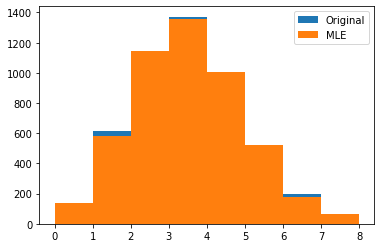

In [17]:
_ = plt.hist(binomial_data, bins=8, rwidth=1.0, label='Original')
_ = plt.hist(np.random.binomial(n=n, p=p_mle, size=size), bins=8, rwidth=1.0, label='MLE')
plt.legend()
plt.show()

In [18]:
p_lambda = 0.9  # actual value of parameter
print(f'Actual lambda: {p_lambda}')

for size in sample_sizes:
    poisson_data = np.random.poisson(lam=p_lambda, size=size)
    lambda_mle = poisson_mle(poisson_data)
    print(f'MLE of lambda: {lambda_mle} at Sample Size: {size}')

Actual lambda: 0.9
MLE of lambda: 1.0 at Sample Size: 10
MLE of lambda: 0.84 at Sample Size: 100
MLE of lambda: 0.891 at Sample Size: 1000
MLE of lambda: 0.8898 at Sample Size: 5000


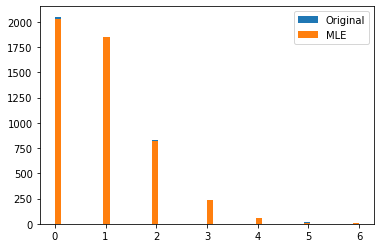

In [19]:
_ = plt.hist(poisson_data, bins=50, rwidth=1.0, label='Original')
_ = plt.hist(np.random.poisson(lam=lambda_mle, size=size), bins=50, rwidth=1.0, label='MLE')
plt.legend()
plt.show()

In [20]:
e_lambda = 1.0  # actual value of parameter
print(f'Actual lambda: {e_lambda}')

for size in sample_sizes:
    exp_data = np.random.exponential(scale=1 / e_lambda, size=size)
    e_lambda_mle = exponential_mle(exp_data)
    print(f'MLE of lambda: {e_lambda_mle} at Sample Size: {size}')

Actual lambda: 1.0
MLE of lambda: 1.0586188146846487 at Sample Size: 10
MLE of lambda: 1.0012063702013814 at Sample Size: 100
MLE of lambda: 0.9523902321662087 at Sample Size: 1000
MLE of lambda: 1.0001063287613827 at Sample Size: 5000


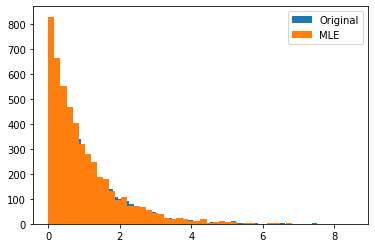

In [21]:
_ = plt.hist(exp_data, bins=50, rwidth=1.0, label='Original')
_ = plt.hist(np.random.exponential(scale=1 / e_lambda_mle, size=size), bins=50, rwidth=1.0, label='MLE')
plt.legend()
plt.show()

In [22]:
g_mu = 1  # actual value of parameter
g_sigma = 2  # actual value of parameter
print(f'Actual mean: {g_mu}, sigma: {g_sigma}')

for size in sample_sizes:
    gaussian_data = np.random.normal(loc=g_mu, scale=g_sigma, size=size)
    g_mu_mle, g_sigma_mle = gaussian_mle(gaussian_data)
    print(f'MLE of mean: {g_mu_mle}, sigma: {g_sigma_mle} at Sample Size: {size}')

Actual mean: 1, sigma: 2
MLE of mean: 1.3634255707639373, sigma: 1.3938249288310929 at Sample Size: 10
MLE of mean: 1.023117337424215, sigma: 2.1762390564886336 at Sample Size: 100
MLE of mean: 0.9587376339996132, sigma: 1.9995772895112711 at Sample Size: 1000
MLE of mean: 1.0226992916796738, sigma: 1.9888851203287763 at Sample Size: 5000


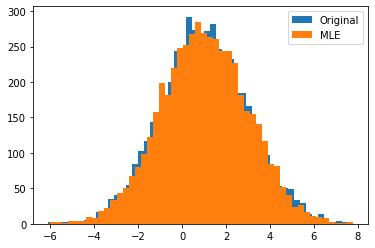

In [23]:
_ = plt.hist(gaussian_data, bins=50, rwidth=1.0, label='Original')
_ = plt.hist(np.random.normal(loc=g_mu_mle, scale=g_sigma_mle, size=size), bins=50, rwidth=1.0, label='MLE')
plt.legend()
plt.show()

In [24]:
l_mu = 1  # actual value of parameter
l_sigma = 2  # actual value of parameter
print(f'Actual mean: {l_mu}, sigma: {l_sigma}')

for size in sample_sizes:
    laplace_data = np.random.laplace(loc=l_mu, scale=l_sigma, size=size)
    l_mu_mle, l_sigma_mle = laplacian_mle(laplace_data)
    print(f'MLE of mean: {l_mu_mle}, sigma: {l_sigma_mle} at Sample Size: {size}')

Actual mean: 1, sigma: 2
MLE of mean: 2.3876241305782675, sigma: 1.4007079375934093 at Sample Size: 10
MLE of mean: 0.9301545370257427, sigma: 1.9877869237128605 at Sample Size: 100
MLE of mean: 0.8155797792592216, sigma: 1.9926704274050764 at Sample Size: 1000
MLE of mean: 0.9948910023564593, sigma: 2.040939407550968 at Sample Size: 5000


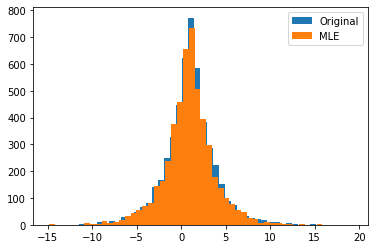

In [25]:
_ = plt.hist(laplace_data, bins=50, rwidth=1.0, label='Original')
_ = plt.hist(np.random.laplace(loc=l_mu_mle, scale=l_sigma_mle, size=size), bins=50, rwidth=1.0, label='MLE')
plt.legend()
plt.show()

We can clearly observe that as the sample size increase, the maximum-likelihood estimates of parameters approach closer to the real value of the parameters.

This is because large sample size represents the distribution better.